# HW6 Math 189

### By Leah Seseri, Imangali Amangeldi

## Question 1

### Question 1, Part A:

For this question, we have started by using desmos to prove our initial guesses that the curve sctches out a circle, centered at -1 and 2, for x_1 and x_2 respectfully. Then by utilizing disscusion slides we have foudn the code to implement it in R

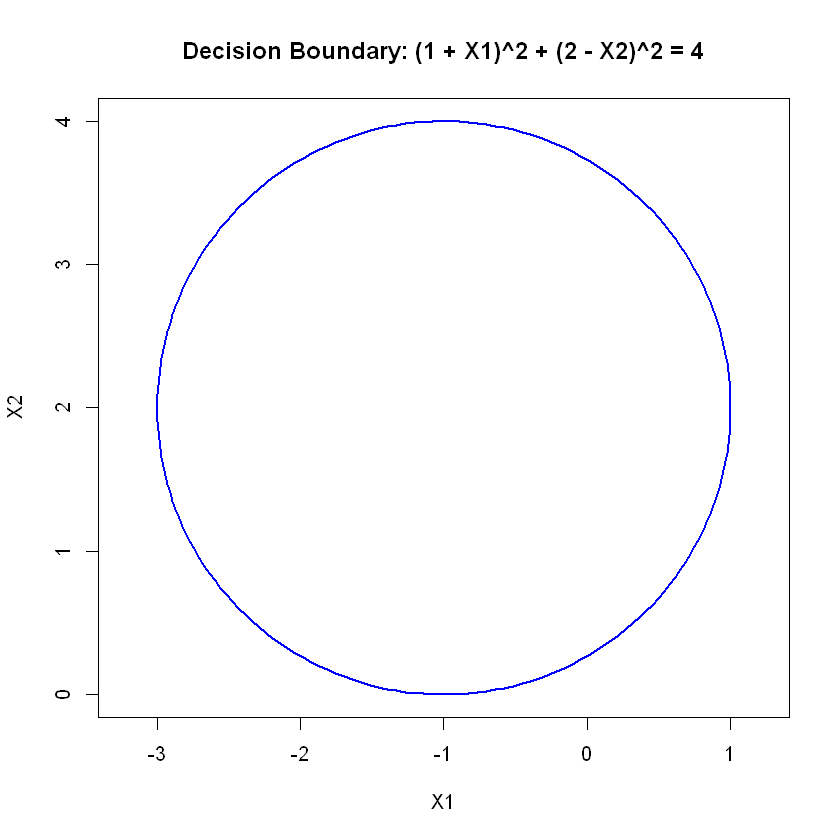

In [84]:
# Define the center and radius of the circle
center_x <- -1
center_y <- 2
radius <- 2

# Generate points around the circle
theta <- seq(0, 2 * pi, length.out = 200)
x_circle <- center_x + radius * cos(theta)
y_circle <- center_y + radius * sin(theta)

# Plot the circle
plot(x_circle, y_circle, type = "l", col = "blue", lwd = 2,
     xlab = "X1", ylab = "X2", asp = 1,
     main = "Decision Boundary: (1 + X1)^2 + (2 - X2)^2 = 4")

### Question 1, Part B:

In [85]:
# Define the points
points_to_check <- data.frame(
  X1 = c(0, -1, 2, 3),
  X2 = c(0, 1, 2, 8)
)

# Apply the correct decision function
decision_values <- (1 + points_to_check$X1)^2 + (2 - points_to_check$X2)^2
classes <- ifelse(decision_values <= 4, "red", "blue")

# Combine into data frame
points_to_check$class <- classes
points_to_check

X1,X2,class
<dbl>,<dbl>,<chr>
0,0,blue
-1,1,red
2,2,blue
3,8,blue


### Question 1, Part C:

From parts a) and b), we have the following formula (1+x_1)^2 + (2-x_2)^2 = 4

To test whether this fucntion is linear in X_2^2, X_1^2, X_1, X_2, let's expand the formula

1 + 2x_1 + x_1^2 + 4 - 4x_2 + x_2^2 = 4

Simplify,

x_1^2 + x_2^2 + 2x_1 - 4x_2 + 1 = 0

By definition an equation (or model) is linear when it is a linear combination of the variables, so is the case here. So even though the decision boundary is not linear in x_1 and x_2 directly, it is linear in the transformed feature space [x_1, x_2, x_2^2, x_1^2]

## Question 2

### Question 2, Part A:

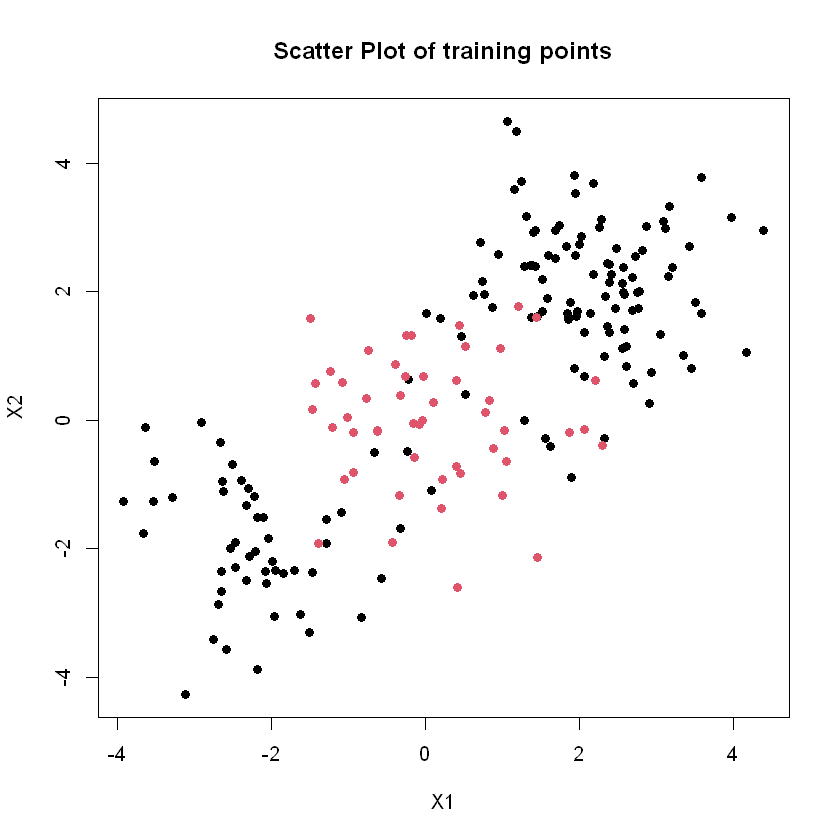

In [86]:
train <- read.csv("SVM_train_updated.csv", row.names = 1)

plot(train$x.1, train$x.2, col=as.factor(train$y), pch=19,
     xlab="X1", ylab="X2", main="Scatter Plot of training points")

Based on the scatter plot of covariates x_1 and x_2, the two classes (as indicated by color) are not linearly separable. There is significant overlap in the region where the two classes interact.

A linear boundary (such as one formed by a straight line or hyperplane) would not perfectly separate the two classes.

The structure and spread of the points suggest that a nonlinear decision boundary (such as a polynomial or RBF kernel) would be more suitable.

Additionally, even with a nonlinear boundary, some misclassifications may still occur, indicating the need for a soft-margin classifier with a level of slack to tolerate some overlap and outliers.

### Question 2, Part B:

In [87]:
install.packages("e1071")
library(e1071)

Warning message:
"package 'e1071' is in use and will not be installed"


In [88]:
# Properly load train and test CSVs
train <- read.csv("SVM_train_updated.csv", row.names = 1)
test <- read.csv("SVM_test_updated.csv", row.names = 1)

# Ensure target is a factor
train$y <- as.factor(train$y)
test$y <- as.factor(test$y)

# Train linear SVM with cross-validation
library(e1071)
set.seed(123)
tune_result <- tune(svm, y ~ ., data = train, kernel = "linear",
                    ranges = list(cost = c(0.1, 1, 4, 10)))

# Best model
best_model_linear <- tune_result$best.model
print(best_model_linear)

# Predict (exclude 'y' column when passing newdata)
train_features <- train[, c("x.1", "x.2")]
test_features <- test[, c("x.1", "x.2")]

train$pred <- predict(best_model_linear, newdata = train_features)
test$pred <- predict(best_model_linear, newdata = test_features)

# Convert predictions to factors
train$pred <- as.factor(train$pred)
test$pred <- as.factor(test$pred)



Call:
best.tune(METHOD = svm, train.x = y ~ ., data = train, ranges = list(cost = c(0.1, 
    1, 4, 10)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  103



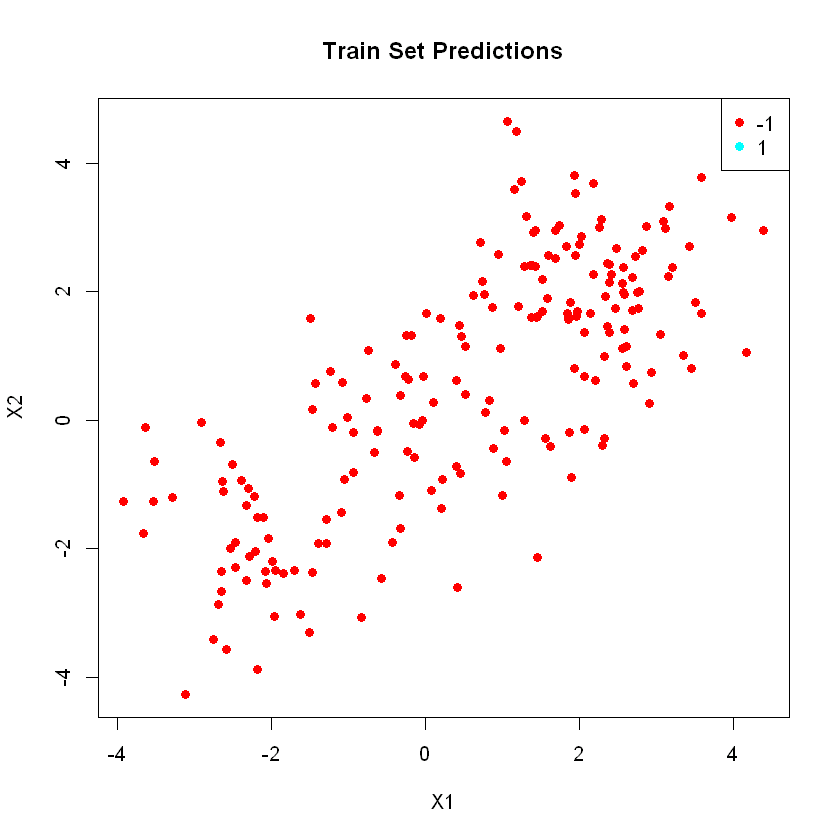

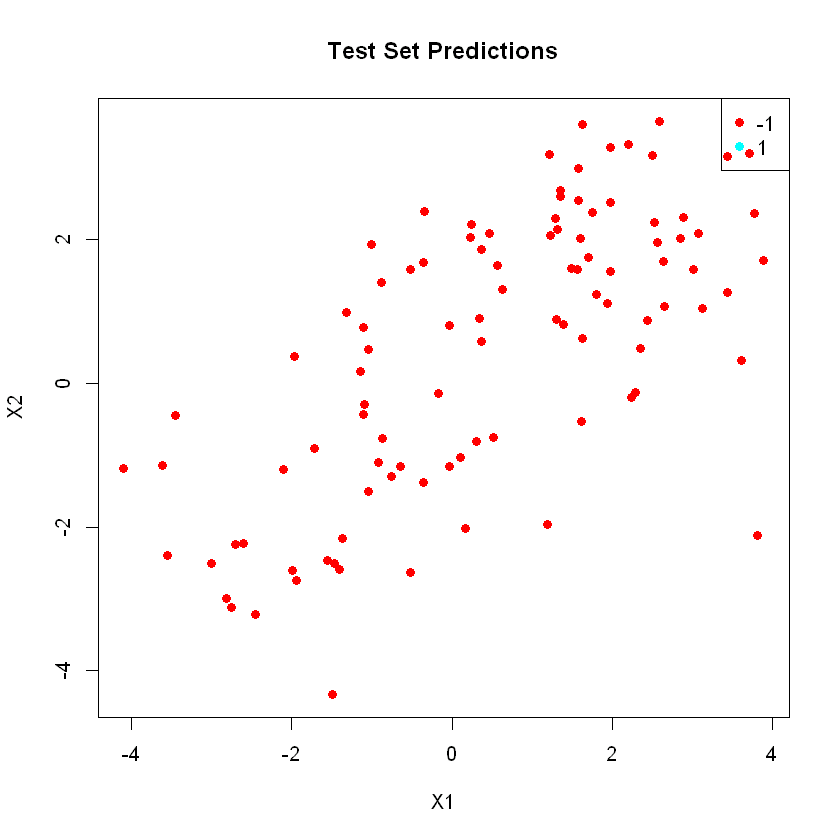

In [89]:
# Colors by prediction
colors <- rainbow(length(levels(train$pred)))

# Training plot
plot(train$x.1, train$x.2, col=colors[train$pred], pch=19,
     main="Train Set Predictions", xlab="X1", ylab="X2")
legend("topright", legend=levels(train$pred), col=colors, pch=19)

# Test plot
plot(test$x.1, test$x.2, col=colors[test$pred], pch=19,
     main="Test Set Predictions", xlab="X1", ylab="X2")
legend("topright", legend=levels(test$pred), col=colors, pch=19)

### Question 2, Part C:

In [90]:
# Step 1: Load the data
train <- read.csv("SVM_train_updated.csv", row.names = 1)
test <- read.csv("SVM_test_updated.csv", row.names = 1)
train$y <- as.factor(train$y)
test$y <- as.factor(test$y)

# Step 2: Tune cost and gamma using cross-validation
set.seed(123)
tune_result_rbf <- tune(
  svm, y ~ ., data = train, kernel = "radial",
  ranges = list(
    cost = c(0.1, 1, 10, 100),
    gamma = c(0.01, 0.1, 0.5, 1)
  )
)

# Step 3: Get the best model
best_model_rbf <- tune_result_rbf$best.model
summary(best_model_rbf)


Call:
best.tune(METHOD = svm, train.x = y ~ ., data = train, ranges = list(cost = c(0.1, 
    1, 10, 100), gamma = c(0.01, 0.1, 0.5, 1)), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  60

 ( 31 29 )


Number of Classes:  2 

Levels: 
 -1 1




In [91]:
install.packages("RColorBrewer")

Warning message:
"package 'RColorBrewer' is in use and will not be installed"


In [92]:
# Prepare feature-only datasets
train_features <- train[, c("x.1", "x.2")]
test_features <- test[, c("x.1", "x.2")]

# Predict
train$pred <- predict(best_model_rbf, newdata = train_features)
test$pred <- predict(best_model_rbf, newdata = test_features)

# Convert predictions to factor for plotting
train$pred <- as.factor(train$pred)
test$pred <- as.factor(test$pred)

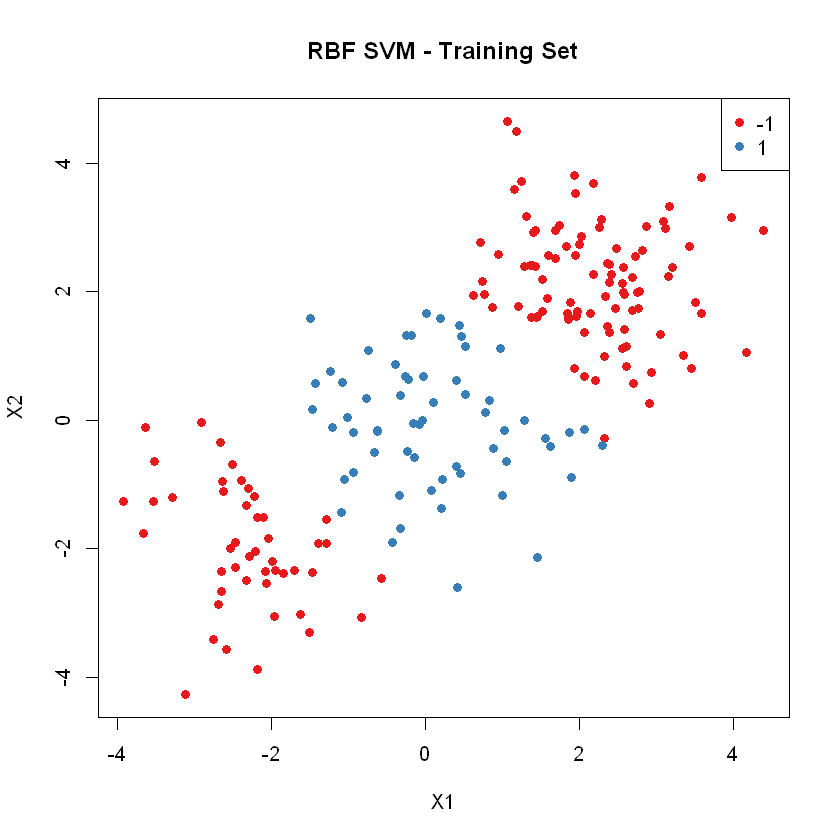

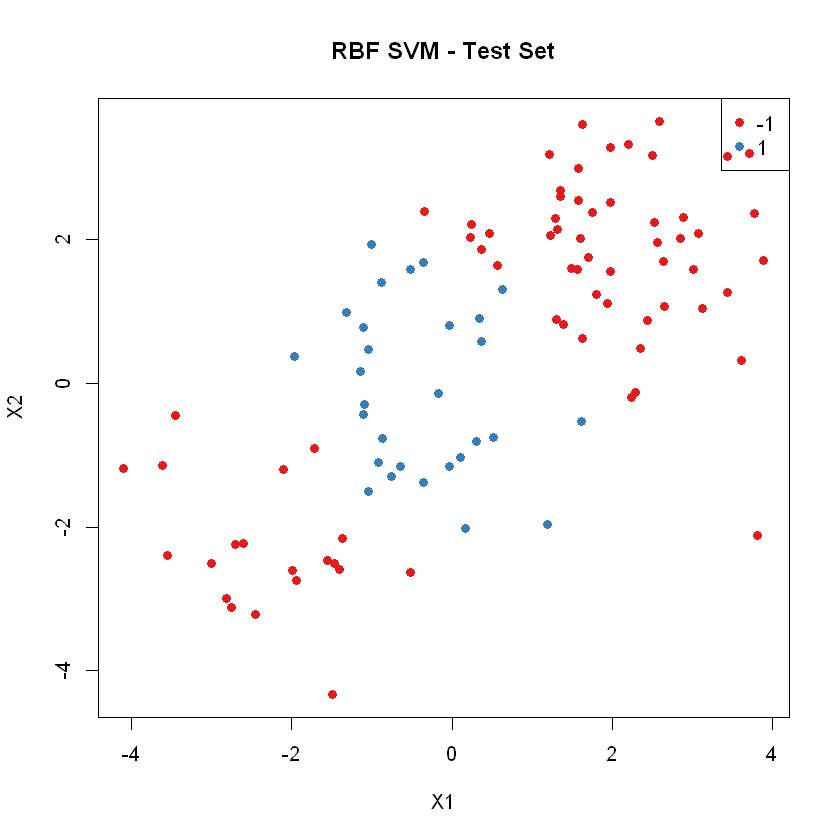

In [93]:
library(RColorBrewer)
colors <- brewer.pal(3, "Set1")

# Training set predictions
plot(train$x.1, train$x.2, col=colors[train$pred], pch=19,
     main="RBF SVM - Training Set", xlab="X1", ylab="X2")
legend("topright", legend=levels(train$pred), col=colors, pch=19)

# Test set predictions
plot(test$x.1, test$x.2, col=colors[test$pred], pch=19,
     main="RBF SVM - Test Set", xlab="X1", ylab="X2")
legend("topright", legend=levels(test$pred), col=colors, pch=19)


### Question 2, Part D:

Warning message:
"package 'ROCR' is in use and will not be installed"


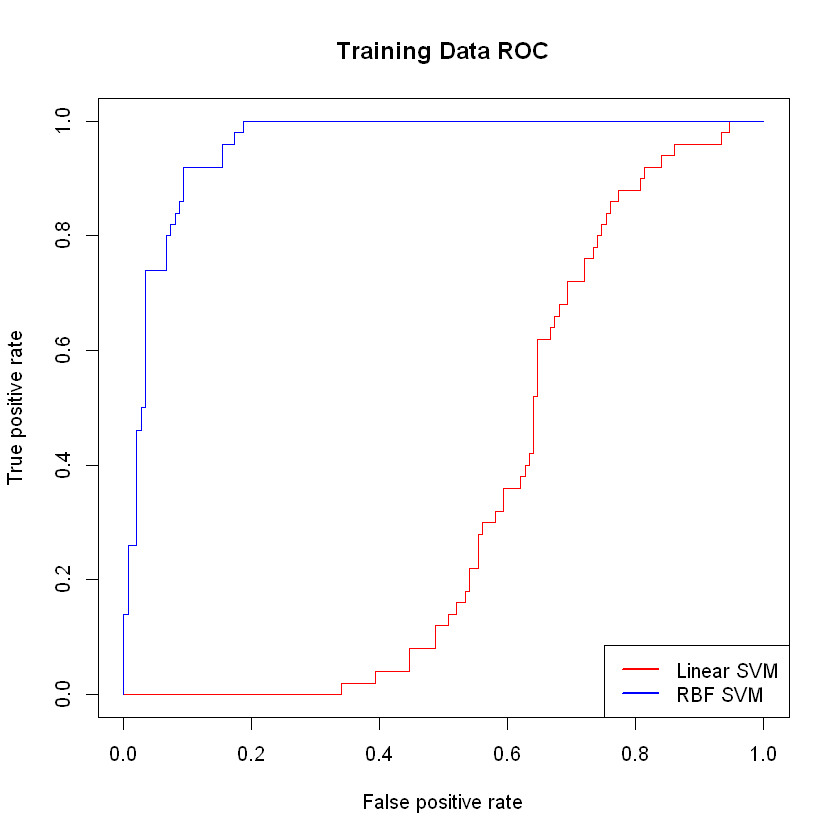

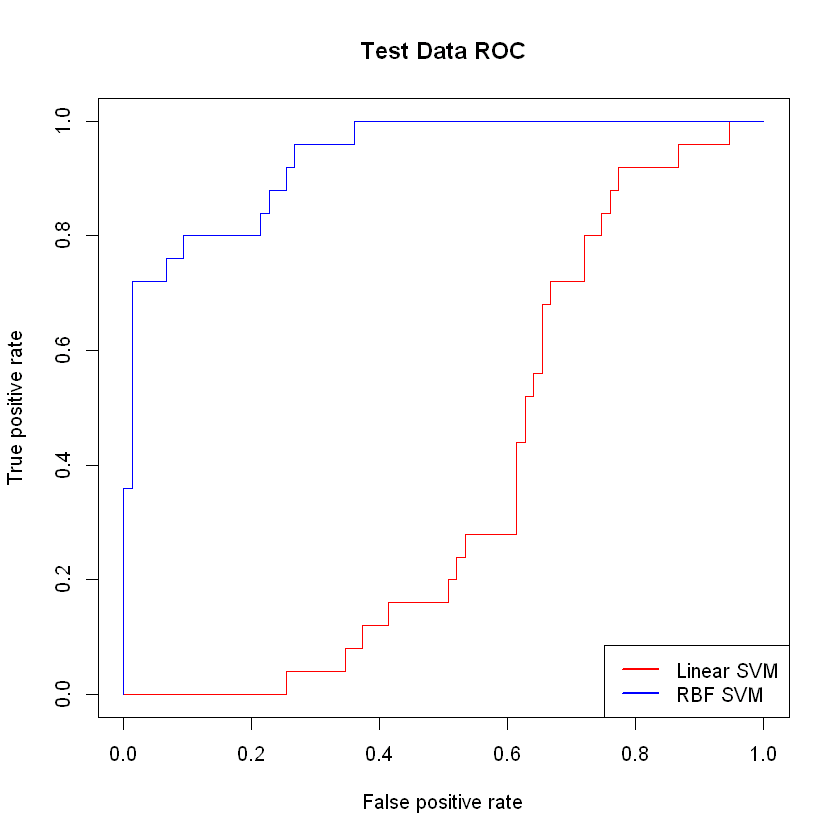

In [94]:
# Load necessary packages
install.packages("ROCR")  # if not already installed
library(ROCR)

# Define helper function for ROC plotting
rocplot <- function(predictions, truth, ...) {
  pred <- prediction(predictions, truth)
  perf <- performance(pred, "tpr", "fpr")
  plot(perf, ...)
}

# Get decision values from both linear and RBF SVMs
# Linear SVM
fitted.linear.train <- attr(predict(best_model_linear, train_features, decision.values = TRUE), "decision.values")
fitted.linear.test  <- attr(predict(best_model_linear, test_features, decision.values = TRUE), "decision.values")

# RBF (Gaussian) SVM
fitted.rbf.train <- attr(predict(best_model_rbf, train_features, decision.values = TRUE), "decision.values")
fitted.rbf.test  <- attr(predict(best_model_rbf, test_features, decision.values = TRUE), "decision.values")

# Plot ROC for Training Data
rocplot(-fitted.linear.train, train$y, main = "Training Data ROC", col = "red")
rocplot(-fitted.rbf.train, train$y, add = TRUE, col = "blue")
legend("bottomright", legend = c("Linear SVM", "RBF SVM"), col = c("red", "blue"), lty = 1, lwd = 2)

# Plot ROC for Test Data
rocplot(-fitted.linear.test, test$y, main = "Test Data ROC", col = "red")
rocplot(-fitted.rbf.test, test$y, add = TRUE, col = "blue")
legend("bottomright", legend = c("Linear SVM", "RBF SVM"), col = c("red", "blue"), lty = 1, lwd = 2)



The RBF SVM performs much better on both the training and test sets, with a steep ROC curve that shows strong class separation.

The linear SVM struggles more, with a flatter curve, showing it's less effective at separating the classes.

On the test set, the RBF model still performs better, suggesting it generalizes well.

The RBF SVM is clearly the better model for this data. It handles the nonlinearity that the linear SVM cannot, leading to much better classification results.
